# A. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Keras 101_Image/MNIST_data/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
pd.set_option('max_info_columns', 1000)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 785 columns):
 #    Column    Non-Null Count  Dtype
---   ------    --------------  -----
 0    label     42000 non-null  int64
 1    pixel0    42000 non-null  int64
 2    pixel1    42000 non-null  int64
 3    pixel2    42000 non-null  int64
 4    pixel3    42000 non-null  int64
 5    pixel4    42000 non-null  int64
 6    pixel5    42000 non-null  int64
 7    pixel6    42000 non-null  int64
 8    pixel7    42000 non-null  int64
 9    pixel8    42000 non-null  int64
 10   pixel9    42000 non-null  int64
 11   pixel10   42000 non-null  int64
 12   pixel11   42000 non-null  int64
 13   pixel12   42000 non-null  int64
 14   pixel13   42000 non-null  int64
 15   pixel14   42000 non-null  int64
 16   pixel15   42000 non-null  int64
 17   pixel16   42000 non-null  int64
 18   pixel17   42000 non-null  int64
 19   pixel18   42000 non-null  int64
 20   pixel19   42000 non-null  int64
 21   pixel20   

In [5]:
# Split X & y
X_org= data.drop('label', axis=1)
y_org= data['label']

In [6]:
print(X_org.shape)
X_org.head()

(42000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(y_org.shape)
y_org.head()

(42000,)


,label
0,1
1,0
2,1
3,4
4,0


4


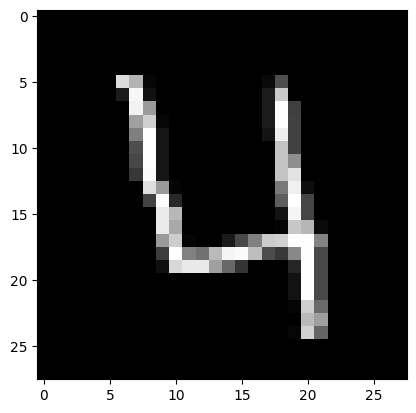

In [8]:
# Draw an image
img = X_org.iloc[3].values.reshape(28,28)
print(y_org.iloc[3])
plt.imshow(img, cmap='gray')

In [9]:
y_org.value_counts().index

Index([1, 7, 3, 9, 2, 6, 0, 4, 8, 5], dtype='int64', name='label')

In [10]:
# Split TRAIN and TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_org, y_org, test_size=0.2, random_state=81)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


# B. Build Keras model

In [11]:
from tensorflow import keras

In [12]:
# 1. Create the model
model = keras.Sequential([
    # Input layer
    keras.Input(shape=(X_train.shape[-1], )),

    # Hidden layers x 3
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),

    # Output layer: 10 classes
    keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 2. Compile the model
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy', #tf.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy'] #[tf.metrics.sparse_categorical_accuracy]
)

model.get_compile_config()

{'optimizer': {'module': 'keras.optimizers',
  'class_name': 'Adam',
  'config': {'name': 'adam',
   'learning_rate': 0.0010000000474974513,
   'weight_decay': None,
   'clipnorm': None,
   'global_clipnorm': None,
   'clipvalue': None,
   'use_ema': False,
   'ema_momentum': 0.99,
   'ema_overwrite_frequency': None,
   'loss_scale_factor': None,
   'gradient_accumulation_steps': None,
   'beta_1': 0.9,
   'beta_2': 0.999,
   'epsilon': 1e-07,
   'amsgrad': False},
  'registered_name': None},
 'loss': 'sparse_categorical_crossentropy',
 'loss_weights': None,
 'metrics': ['accuracy'],
 'weighted_metrics': None,
 'run_eagerly': False,
 'steps_per_execution': 1,
 'jit_compile': False}

In [18]:
# 3. Train the model
model.fit(X_train, y_train, batch_size=64, epochs=32)
model.get_metrics_result()

Epoch 1/32
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7566 - loss: 3.8452
Epoch 2/32
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9219 - loss: 0.3459
Epoch 3/32
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9439 - loss: 0.2073
Epoch 4/32
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9583 - loss: 0.1470
Epoch 5/32
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9597 - loss: 0.1311
Epoch 6/32
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9646 - loss: 0.1291
Epoch 7/32
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9719 - loss: 0.0938
Epoch 8/32
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9724 - loss: 0.0979
Epoch 9/32
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9708 - loss: 0.0958
Epoch 10/32
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9776 - loss: 0.0761
Epoch 11/32
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9811 - loss: 0.0670
Epoch 12/32
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

{'accuracy': 0.9916666746139526, 'loss': 0.03199639916419983}

In [19]:
# 4. Validate the model with TRAIN SET
y_train_prob = model.predict(X_train)
print(y_train_prob[:5])

y_train_pred = y_train_prob.argmax(axis=1)
print(y_train_pred[:10])

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[[4.13339486e-35 1.73197145e-20 2.64055041e-26 0.00000000e+00
  9.99999940e-01 9.68708250e-31 2.30880462e-32 3.04860693e-23
  4.63636382e-25 6.14979056e-14]
 [2.02425028e-04 8.15921885e-05 3.66380777e-06 8.54752216e-06
  1.59943490e-08 2.12762432e-04 1.00114718e-02 2.15712408e-08
  9.89477873e-01 1.62953040e-06]
 [9.97537255e-01 2.37072784e-09 1.09872168e-07 3.12806776e-08
  4.83519922e-04 1.30151747e-08 1.66899897e-03 2.26321208e-06
  1.36212241e-08 3.07873474e-04]
 [3.08385745e-25 9.99999940e-01 1.08084940e-15 2.03818712e-19
  1.33121604e-11 1.54251449e-16 1.26943622e-19 3.53134297e-12
  4.72468627e-11 8.82852846e-18]
 [1.74734216e-26 3.22753855e-20 1.02047156e-20 1.60259130e-31
  9.99999940e-01 7.70726634e-23 4.35030309e-22 1.72269565e-18
  3.90253119e-23 4.28855058e-13]]
[4 8 0 1 4 1 7 0 5 8]


In [22]:
# 5. Validate the model with TEST SET
y_test_prob = model.predict(X_test)
print(y_test_prob[:5])

y_test_pred = y_test_prob.argmax(axis=1)
print(y_test_pred[:10])

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.0000000e+00 7.2886877e-02 0.0000000e+00 2.0404083e-38 0.0000000e+00
  2.1980244e-09 4.8390122e-21 8.8427293e-01 4.8765347e-22 4.2840134e-02]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  9.9999994e-01 7.3318775e-18 0.0000000e+00 0.0000000e+00 2.5391046e-24]
 [0.0000000e+00 1.1883199e-19 0.0000000e+00 0.0000000e+00 0.0000000e+00
  9.0848297e-26 3.5926182e-22 3.7590273e-10 2.2463765e-30 9.9999994e-01]
 [1.2639743e-28 3.5799385e-20 4.4248603e-31 0.0000000e+00 0.0000000e+00
  1.8297909e-30 3.4929379e-08 9.9999946e-01 3.2173847e-34 4.5448027e-07]
 [0.0000000e+00 2.1235070e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
  9.9515172e-38 1.0085122e-37 9.5168346e-01 1.2295555e-31 4.6192925e-02]]
[7 5 9 7 7 5 7 7 9 9]
